# Capstone - Final Assignment - Notebook with Code

_______________________

###### By Aine Webster

### Commentary: Import libraries

In [36]:
import pandas as pd   
import numpy as np
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests

import matplotlib.cm as mtp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# import k-means from clustering stage
#from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## I. Birmingham Analysis

______________________________________

### Commentary: Import UK postcodes with longitude and latitude values

###### Source: https://www.doogal.co.uk/PostcodeDownloads.php

In [37]:
path = '/Users/evelina/Desktop/B_postcodes.csv'
Birmingham=pd.read_csv(path)

Birmingham2=Birmingham[[
'Postcode', 
'Latitude',
'Longitude',
'District'
]]

Birmingham2.head()

,Postcode,Latitude,Longitude,District
0,B1 1AA,52.476660,-1.903535,Birmingham
1,B1 1AD,52.476660,-1.903535,Birmingham
2,B1 1AG,52.474528,-1.902156,Birmingham
3,B1 1AH,52.476391,-1.904257,Birmingham
4,B1 1AQ,52.474528,-1.902156,Birmingham


In [38]:
# Group longitude and latitude 
District_grouped = Birmingham2.groupby(Birmingham2['District'])

aggregate = {'Latitude':'mean', 'Longitude':'mean'}

Birmingham_Districts = District_grouped.agg(aggregate)
Birmingham_Districts.reset_index()

,District,Latitude,Longitude
0,Birmingham,52.480983,-1.884851
1,Bromsgrove,52.349715,-2.018707
2,Dudley,52.458410,-2.052813
3,Lichfield,52.634437,-1.737459
4,North Warwickshire,52.549404,-1.676690
5,North West Leicestershire,52.677736,-1.561533
6,Redditch,52.300541,-1.935346
7,Sandwell,52.502940,-2.002299
8,Solihull,52.425547,-1.777659
9,Stratford-on-Avon,52.251544,-1.844145


### Commentary: Visualize area on map

In [77]:
latitude=52.480983
longitude=-1.884851

In [78]:
# create map of Birmingham area using latitude and longitude values
map_birmingham = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(Birmingham_Districts['Latitude'], Birmingham_Districts['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_birmingham) 

#show map
map_birmingham

### Commentary: Use Foresquare API data to search for jewellery venues in the area

In [41]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1'
CLIENT_SECRET = 'CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J'
VERSION = '20180604' # Foursquare API version
radius = 10000
limit = 100

#define URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    radius,
limit)
url # display URL

#venue category for jewelry stores is: 4bf58dd8d48988d111951735

'https://api.foursquare.com/v2/venues/search?&client_id=YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1&client_secret=CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J&v=20180604&ll=52.480983,-1.884851&radius=10000&limit100'

In [42]:
#take whats relevant
results = requests.get(url).json()['response']['venues']

In [43]:
#transform to pandas dataframe
dataframe = json_normalize(results)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '50aa9e094b90af0d42d5de0d', 'name': 'C...",False,4b05882df964a520c8b622e3,NaN,GB,West Midlands,United Kingdom,NaN,1006,"[West Midlands, United Kingdom]",NaN,52.478280,-1.899018,NaN,NaN,West Midlands,Birmingham,v-1546347239,NaN
1,"[{'id': '4bf58dd8d48988d12d941735', 'name': 'M...",False,4b05882cf964a52087b622e3,Curzon St.,GB,Birmingham,United Kingdom,NaN,141,"[Curzon St., Birmingham, West Midlands, B4 7XG...","[{'label': 'display', 'lat': 52.48168854048393...",52.481689,-1.886580,NaN,B4 7XG,West Midlands,Curzon Street Station,v-1546347239,NaN
2,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",False,4cbda658bac93704df5cff7c,Millenium Point,GB,Birmingham,United Kingdom,Curzon St,208,"[Millenium Point (Curzon St), Birmingham, West...","[{'label': 'display', 'lat': 52.48282220080988...",52.482822,-1.885423,NaN,NaN,West Midlands,Birmingham City University,v-1546347239,NaN
3,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,50c74e07e4b0650838cec929,Curzon St.,GB,Birmingham,United Kingdom,NaN,161,"[Curzon St., Birmingham, West Midlands, United...","[{'label': 'display', 'lat': 52.48198430339664...",52.481984,-1.886585,NaN,NaN,West Midlands,Eastside City Park,v-1546347239,NaN
4,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",False,553e440c498e53f7c3821a2d,113 Fazeley St,GB,Birmingham,United Kingdom,NaN,211,"[113 Fazeley St, Birmingham, West Midlands, B5...","[{'label': 'display', 'lat': 52.47908379561802...",52.479084,-1.884783,NaN,B5 5RX,West Midlands,Argeela Lounge & Grill,v-1546347239,NaN


In [44]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Birmingham,City,NaN,GB,West Midlands,United Kingdom,NaN,1006,"[West Midlands, United Kingdom]",NaN,52.478280,-1.899018,NaN,NaN,West Midlands,4b05882df964a520c8b622e3
1,Curzon Street Station,Monument / Landmark,Curzon St.,GB,Birmingham,United Kingdom,NaN,141,"[Curzon St., Birmingham, West Midlands, B4 7XG...","[{'label': 'display', 'lat': 52.48168854048393...",52.481689,-1.886580,NaN,B4 7XG,West Midlands,4b05882cf964a52087b622e3
2,Birmingham City University,University,Millenium Point,GB,Birmingham,United Kingdom,Curzon St,208,"[Millenium Point (Curzon St), Birmingham, West...","[{'label': 'display', 'lat': 52.48282220080988...",52.482822,-1.885423,NaN,NaN,West Midlands,4cbda658bac93704df5cff7c
3,Eastside City Park,Park,Curzon St.,GB,Birmingham,United Kingdom,NaN,161,"[Curzon St., Birmingham, West Midlands, United...","[{'label': 'display', 'lat': 52.48198430339664...",52.481984,-1.886585,NaN,NaN,West Midlands,50c74e07e4b0650838cec929
4,Argeela Lounge & Grill,Lounge,113 Fazeley St,GB,Birmingham,United Kingdom,NaN,211,"[113 Fazeley St, Birmingham, West Midlands, B5...","[{'label': 'display', 'lat': 52.47908379561802...",52.479084,-1.884783,NaN,B5 5RX,West Midlands,553e440c498e53f7c3821a2d


In [45]:
#all retail shopping stores
birmingham_format=dataframe_filtered[['name', 'categories','lat','lng']]
birmingham_retail=birmingham_format[birmingham_format['categories'].str.contains('shopping')]

In [75]:
#all jewellery stores
birmingham_final=birmingham_format[birmingham_format.categories=='Jewelry Store']

### Commentary: Visualize and look at spread of Birmingham Jewelry Stores on map

In [114]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(birmingham_final.lat, birmingham_final.lng, birmingham_final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Results summary of current jewelry stores: There is a "Jewellery Quater" in Birmingham and most of the jewellery stores are located tightly within this. This may be a different market to break.

## II. Glasgow Analysis

__________________________

### Commentary: Import UK postcodes with longitude and latitude values

###### Source: https://www.doogal.co.uk/PostcodeDownloads.php

In [48]:
path = '/Users/evelina/Desktop/G_postcodes.csv'
Glasgow=pd.read_csv(path)

Glasgow2=Glasgow[[
'Postcode', 
'Latitude',
'Longitude',
'District'
]]

Glasgow2.head()

/Users/evelina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Postcode,Latitude,Longitude,District
0,G1 1AB,55.860737,-4.244422,Glasgow City
1,G1 1BA,55.860886,-4.241472,Glasgow City
2,G1 1BL,55.858321,-4.243146,Glasgow City
3,G1 1BN,55.858354,-4.242797,Glasgow City
4,G1 1BP,55.858343,-4.242924,Glasgow City


In [5]:
# Group longitude and latitude 
District_grouped = Glasgow2.groupby(Glasgow2['District'])

aggregate = {'Latitude':'mean', 'Longitude':'mean'}

Glasgow_Districts = District_grouped.agg(aggregate)
Glasgow_Districts.reset_index()

,District,Latitude,Longitude
0,Argyll and Bute,56.019322,-4.743146
1,East Ayrshire,55.748944,-4.482965
2,East Dunbartonshire,55.931451,-4.232238
3,East Renfrewshire,55.787624,-4.329779
4,Falkirk,55.974441,-3.942772
5,Glasgow City,55.859335,-4.262601
6,North Ayrshire,55.758747,-4.544847
7,North Lanarkshire,55.922273,-4.040813
8,Renfrewshire,55.859304,-4.370115
9,South Lanarkshire,55.791369,-4.164530


### Commentary: Visualize area on map

In [79]:
latitude=55.859335
longitude=-4.262601

In [7]:
# create map of Birmingham area using latitude and longitude values
map_glasgow= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(Glasgow_Districts['Latitude'], Glasgow_Districts['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_glasgow) 

#show map
map_glasgow

### Commentary: Use Foresquare API data to search for jewellery venues in the area

In [90]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1'
CLIENT_SECRET = 'CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J'
VERSION = '20180604' # Foursquare API version
radius = 10000
limit = 100

#define URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    radius,
limit)
url # display URL

#venue category for jewelry stores is: 4bf58dd8d48988d111951735

'https://api.foursquare.com/v2/venues/search?&client_id=YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1&client_secret=CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J&v=20180604&ll=55.859335,-4.262601&radius=10000&limit100'

In [82]:
#take whats relevant
results = requests.get(url).json()['response']['venues']

In [83]:
#transform to pandas dataframe
dataframe = json_normalize(results)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",False,567ff9bb498ecedae44bd928,NaN,GB,NaN,United Kingdom,NaN,477,[United Kingdom],"[{'label': 'display', 'lat': 55.859776, 'lng':...",55.859776,-4.255002,NaN,NaN,John Macintyre-jewellers,v-1546348571,NaN
1,"[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",False,509e4a88e4b0d1661be0a248,NaN,GB,NaN,United Kingdom,NaN,446,[United Kingdom],"[{'label': 'display', 'lat': 55.86045837402344...",55.860458,-4.255748,NaN,NaN,Jodie's Jewellery Boutique,v-1546348571,NaN
2,"[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",False,586d29ee0b56563864be142c,54 Gordon St,GB,Glasgow,United Kingdom,NaN,401,"[54 Gordon St, Glasgow, G1 3PU, United Kingdom]","[{'label': 'display', 'lat': 55.8606768, 'lng'...",55.860677,-4.256630,G1 3PU,NaN,Sovereign Jewellers & Engravers,v-1546348571,NaN
3,"[{'id': '52f2ab2ebcbc57f1066b8b2f', 'name': 'O...",False,57f8474a498ec833f5c36ebd,"1st Floor, 34 Argyll Arcade",GB,Glasgow,United Kingdom,NaN,529,"[1st Floor, 34 Argyll Arcade, Glasgow, Glasgow...","[{'label': 'display', 'lat': 55.8589559, 'lng'...",55.858956,-4.254145,G2 8BD,Glasgow City,J M Jewellery Services,v-1546348571,NaN
4,"[{'id': '5032885091d4c4b30a586d66', 'name': 'R...",False,5a74498026659b17875fb7a6,21 Forbes Place,GB,Paisley,United Kingdom,NaN,10130,"[21 Forbes Place, Paisley, Renfrewshire, PA1 1...","[{'label': 'display', 'lat': 55.8441619, 'lng'...",55.844162,-4.422455,PA1 1UT,Renfrewshire,Jewel Homes Paisley,v-1546348571,NaN


In [84]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,John Macintyre-jewellers,Jewelry Store,NaN,GB,NaN,United Kingdom,NaN,477,[United Kingdom],"[{'label': 'display', 'lat': 55.859776, 'lng':...",55.859776,-4.255002,NaN,NaN,567ff9bb498ecedae44bd928
1,Jodie's Jewellery Boutique,Jewelry Store,NaN,GB,NaN,United Kingdom,NaN,446,[United Kingdom],"[{'label': 'display', 'lat': 55.86045837402344...",55.860458,-4.255748,NaN,NaN,509e4a88e4b0d1661be0a248
2,Sovereign Jewellers & Engravers,Jewelry Store,54 Gordon St,GB,Glasgow,United Kingdom,NaN,401,"[54 Gordon St, Glasgow, G1 3PU, United Kingdom]","[{'label': 'display', 'lat': 55.8606768, 'lng'...",55.860677,-4.256630,G1 3PU,NaN,586d29ee0b56563864be142c
3,J M Jewellery Services,Other Repair Shop,"1st Floor, 34 Argyll Arcade",GB,Glasgow,United Kingdom,NaN,529,"[1st Floor, 34 Argyll Arcade, Glasgow, Glasgow...","[{'label': 'display', 'lat': 55.8589559, 'lng'...",55.858956,-4.254145,G2 8BD,Glasgow City,57f8474a498ec833f5c36ebd
4,Jewel Homes Paisley,Real Estate Office,21 Forbes Place,GB,Paisley,United Kingdom,NaN,10130,"[21 Forbes Place, Paisley, Renfrewshire, PA1 1...","[{'label': 'display', 'lat': 55.8441619, 'lng'...",55.844162,-4.422455,PA1 1UT,Renfrewshire,5a74498026659b17875fb7a6


In [ ]:
#all retail shopping stores
glasgow_format=dataframe_filtered[['name', 'categories','lat','lng']]
glasgow_retail=glasgow_format[glasgow_format['categories'].str.contains('shopping')]

In [89]:
#all jewelery stores
glasgow_final=glasgow_format[glasgow_format.categories=='Jewelry Store']
glasgow_final.head()

,name,categories,lat,lng
0,John Macintyre-jewellers,Jewelry Store,55.859776,-4.255002
1,Jodie's Jewellery Boutique,Jewelry Store,55.860458,-4.255748
2,Sovereign Jewellers & Engravers,Jewelry Store,55.860677,-4.256630
6,Market saleroom jewellers,Jewelry Store,55.853140,-4.238870
7,Goldsmith & Jeweler,Jewelry Store,55.836728,-4.264789


### Commentary: Visualize and look at spread of Glasgow Jewelry Stores on map

In [88]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(glasgow_final.lat, glasgow_final.lng, glasgow_final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Results summary of current jewelry stores: Jewellery stores in Glasgow are very spread apart and this may provide an opportunity to locate to a new area with minimum competition close by.

## III. Liverpool Analysis

______________________

### Commentary: Import UK postcodes with longitude and latitude values

###### Source: https://www.doogal.co.uk/PostcodeDownloads.php

In [49]:
path = '/Users/evelina/Desktop/L_postcodes.csv'
Liverpool=pd.read_csv(path)

Liverpool2=Liverpool[[
'Postcode', 
'Latitude',
'Longitude',
'District'
]]

Liverpool2.head()

/Users/evelina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Postcode,Latitude,Longitude,District
0,L1 0AA,53.396727,-2.981033,Liverpool
1,L1 0AB,53.397129,-2.980215,Liverpool
2,L1 0AD,53.396510,-2.978982,Liverpool
3,L1 0AE,53.395992,-2.983978,Liverpool
4,L1 0AF,53.398315,-2.982468,Liverpool


In [50]:
# Group longitude and latitude 
District_grouped = Liverpool2.groupby(Liverpool2['District'])

aggregate = {'Latitude':'mean', 'Longitude':'mean'}

Liverpool_Districts = District_grouped.agg(aggregate)
Liverpool_Districts.reset_index()

,District,Latitude,Longitude
0,Cheshire West and Chester,53.279897,-2.956192
1,Chorley,53.629331,-2.763058
2,Halton,53.337539,-2.800351
3,Knowsley,53.434849,-2.849098
4,Liverpool,53.406554,-2.938671
5,Sefton,53.491536,-3.000227
6,St. Helens,53.418289,-2.768624
7,West Lancashire,53.574215,-2.880349
8,Wirral,53.379702,-3.060500


### Commentary: Visualize area on map

In [51]:
latitude=53.406554
longitude=-2.938671

In [53]:
# create map of Birmingham area using latitude and longitude values
map_liverpool= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(Liverpool_Districts['Latitude'], Liverpool_Districts['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_liverpool) 

#show map
map_liverpool

In [55]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1'
CLIENT_SECRET = 'CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J'
VERSION = '20180604' # Foursquare API version
radius = 10000
limit = 100

#define URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    radius,
limit)
url # display URL

#venue category for jewelry stores is: 4bf58dd8d48988d111951735

'https://api.foursquare.com/v2/venues/search?&client_id=YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1&client_secret=CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J&v=20180604&ll=53.406554,-2.938671&radius=10000&limit100'

In [56]:
#take whats relevant
results = requests.get(url).json()['response']['venues']

In [57]:
#transform to pandas dataframe
dataframe = json_normalize(results)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4b6ed3c4f964a52045cc2ce3,Botanic Rd,GB,Wavertree,United Kingdom,Edge Lane Dr,382,"[Botanic Rd (Edge Lane Dr), Wavertree, Liverpo...","[{'label': 'display', 'lat': 53.40569572702504...",53.405696,-2.944255,NaN,Liverpool,Wavertree Botanic Gardens,v-1546347399
1,"[{'id': '4bf58dd8d48988d174941735', 'name': 'C...",False,4c458dc3f0bdd13adf0bcbcc,NaN,GB,Liverpool,United Kingdom,NaN,346,"[Liverpool, United Kingdom]","[{'label': 'display', 'lat': 53.40893997189816...",53.408940,-2.935309,NaN,Liverpool,Liverpool Innovation Park,v-1546347399
2,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",False,4bf52ac3cad2c928d0ac9c99,NaN,GB,Liverpool,United Kingdom,NaN,182,"[Liverpool, United Kingdom]","[{'label': 'display', 'lat': 53.40645617407765...",53.406456,-2.935922,NaN,Liverpool,University of Liverpool,v-1546347399
3,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4b0bad47f964a520003323e3,Lime St,GB,Liverpool,United Kingdom,NaN,2637,"[Lime St, Liverpool, L1 1JD, United Kingdom]",NaN,53.407586,-2.978383,L1 1JD,Liverpool,Liverpool Lime Street Railway Station (LIV),v-1546347399
4,"[{'id': '4bf58dd8d48988d174941735', 'name': 'C...",False,4c6a5966897b1b8d8a83b117,NaN,GB,Liverpool,United Kingdom,NaN,157,"[Liverpool, L7 9pt, United Kingdom]","[{'label': 'display', 'lat': 53.40530552209916...",53.405306,-2.937557,L7 9pt,Liverpool,Nutricia Liverpool,v-1546347399


In [58]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Wavertree Botanic Gardens,Park,Botanic Rd,GB,Wavertree,United Kingdom,Edge Lane Dr,382,"[Botanic Rd (Edge Lane Dr), Wavertree, Liverpo...","[{'label': 'display', 'lat': 53.40569572702504...",53.405696,-2.944255,NaN,Liverpool,4b6ed3c4f964a52045cc2ce3
1,Liverpool Innovation Park,Coworking Space,NaN,GB,Liverpool,United Kingdom,NaN,346,"[Liverpool, United Kingdom]","[{'label': 'display', 'lat': 53.40893997189816...",53.408940,-2.935309,NaN,Liverpool,4c458dc3f0bdd13adf0bcbcc
2,University of Liverpool,University,NaN,GB,Liverpool,United Kingdom,NaN,182,"[Liverpool, United Kingdom]","[{'label': 'display', 'lat': 53.40645617407765...",53.406456,-2.935922,NaN,Liverpool,4bf52ac3cad2c928d0ac9c99
3,Liverpool Lime Street Railway Station (LIV),Train Station,Lime St,GB,Liverpool,United Kingdom,NaN,2637,"[Lime St, Liverpool, L1 1JD, United Kingdom]",NaN,53.407586,-2.978383,L1 1JD,Liverpool,4b0bad47f964a520003323e3
4,Nutricia Liverpool,Coworking Space,NaN,GB,Liverpool,United Kingdom,NaN,157,"[Liverpool, L7 9pt, United Kingdom]","[{'label': 'display', 'lat': 53.40530552209916...",53.405306,-2.937557,L7 9pt,Liverpool,4c6a5966897b1b8d8a83b117


In [ ]:
#all retail shopping stores
liverpool_format=dataframe_filtered[['name', 'categories','lat','lng']]
liverpool_retail=liverpool_format[liverpool_format['categories'].str.contains('shopping')]

In [73]:
#all jewelry stores
liverpool_final=liverpool_format[liverpool_format.categories=='Jewelry Store']

### Commentary: Visualize and look at spread of Liverpool Jewelry Stores on map

In [48]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(liverpool_final.lat, liverpool_final.lng, liverpool_final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Results summary of current jewelry stores: There are few jewellery stores in Liverpool centre. This suggests a good opportunity to locate central in Liverpool.

## IV. Bristol Analysis

____________________________________

###### Source: https://www.doogal.co.uk/PostcodeDownloads.php

In [61]:
path = '/Users/evelina/Desktop/BS_postcodes.csv'
Bristol=pd.read_csv(path)

Bristol2=Bristol[[
'Postcode', 
'Latitude',
'Longitude',
'District'
]]

Bristol2.head()

,Postcode,Latitude,Longitude,District
0,BS0 1ZZ,51.343881,-2.957023,North Somerset
1,BS1 1AA,51.449516,-2.578370,"Bristol, City of"
2,BS1 1AB,51.449516,-2.578370,"Bristol, City of"
3,BS1 1AD,51.458457,-2.574165,"Bristol, City of"
4,BS1 1AE,51.449516,-2.578370,"Bristol, City of"


In [62]:
# Group longitude and latitude 
District_grouped = Bristol2.groupby(Bristol2['District'])

aggregate = {'Latitude':'mean', 'Longitude':'mean'}

Bristol_Districts = District_grouped.agg(aggregate)
Bristol_Districts.reset_index()

,District,Latitude,Longitude
0,Bath and North East Somerset,51.366069,-2.533896
1,"Bristol, City of",51.460627,-2.587470
2,Mendip,51.272765,-2.710768
3,North Somerset,51.392853,-2.832076
4,Sedgemoor,51.268247,-2.820586
5,South Gloucestershire,51.516168,-2.504256


### Commentary: Visualize area on map

In [63]:
latitude=51.460627
longitude=-2.587470

In [64]:
# create map of Birmingham area using latitude and longitude values
map_bristol= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(Bristol_Districts['Latitude'], Bristol_Districts['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bristol) 

#show map
map_bristol

In [66]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1'
CLIENT_SECRET = 'CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J'
VERSION = '20180604' # Foursquare API version
radius = 10000
limit = 100

#define URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    radius,
limit)
url # display URL

#venue category for jewelry stores is: 4bf58dd8d48988d111951735

'https://api.foursquare.com/v2/venues/search?&client_id=YMIFEZE1XTH11CSYYTTDJY2Z04JZOU23WTAVV0I33NQVGUY1&client_secret=CW5TO51EXSXIAGKF3VAZR5QVXACPIRDNXZRAN0QZKA2L0X4J&v=20180604&ll=51.460627,-2.58747&radius=10000&limit100'

In [67]:
#take whats relevant
results = requests.get(url).json()['response']['venues']

In [68]:
#transform to pandas dataframe
dataframe = json_normalize(results)
dataframe.head()

,categories,events.count,events.summary,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",NaN,NaN,False,4f54ac71e4b0bf6b5f9296c0,Brunswick Court,GB,Bristol,United Kingdom,Brunswick Square,70,"[Brunswick Court (Brunswick Square), Bristol, ...","[{'label': 'display', 'lat': 51.46043303269199...",51.460433,-2.588430,BS2 8PE,Bristol,Brunswick Court,v-1546347591
1,"[{'id': '4bf58dd8d48988d15c941735', 'name': 'C...",NaN,NaN,False,4e845705d3e35a80a8ebcea7,NaN,GB,Bristol,United Kingdom,NaN,54,"[Bristol, United Kingdom]","[{'label': 'display', 'lat': 51.46018518814507...",51.460185,-2.587799,NaN,NaN,Brunswick Cemetery Gardens,v-1546347591
2,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",NaN,NaN,False,4e844f7cb803a269257a5df4,NaN,GB,Bristol,United Kingdom,NaN,78,"[Bristol, United Kingdom]","[{'label': 'display', 'lat': 51.45993658659806...",51.459937,-2.587240,NaN,Bristol,Brunswick Square,v-1546347591
3,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",NaN,NaN,False,5a33be148ad62e5f60c8f663,Glass Walk,GB,Bristol,United Kingdom,NaN,283,"[Glass Walk, Bristol, BS1 3BQ, United Kingdom]","[{'label': 'display', 'lat': 51.458535, 'lng':...",51.458535,-2.585149,BS1 3BQ,Bristol,Casa Brasil,v-1546347591
4,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",NaN,NaN,False,4c2f39a3213c2d7fc76e305d,Portland Sq,GB,Bristol,United Kingdom,Cave St,137,"[Portland Sq (Cave St), St. Paul's, Bristol, B...","[{'label': 'display', 'lat': 51.46095939981568...",51.460959,-2.585564,BS2 8QN,Bristol,Portland Square,v-1546347591


In [69]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Brunswick Court,Office,Brunswick Court,GB,Bristol,United Kingdom,Brunswick Square,70,"[Brunswick Court (Brunswick Square), Bristol, ...","[{'label': 'display', 'lat': 51.46043303269199...",51.460433,-2.588430,BS2 8PE,Bristol,4f54ac71e4b0bf6b5f9296c0
1,Brunswick Cemetery Gardens,Cemetery,NaN,GB,Bristol,United Kingdom,NaN,54,"[Bristol, United Kingdom]","[{'label': 'display', 'lat': 51.46018518814507...",51.460185,-2.587799,NaN,NaN,4e845705d3e35a80a8ebcea7
2,Brunswick Square,Plaza,NaN,GB,Bristol,United Kingdom,NaN,78,"[Bristol, United Kingdom]","[{'label': 'display', 'lat': 51.45993658659806...",51.459937,-2.587240,NaN,Bristol,4e844f7cb803a269257a5df4
3,Casa Brasil,Brazilian Restaurant,Glass Walk,GB,Bristol,United Kingdom,NaN,283,"[Glass Walk, Bristol, BS1 3BQ, United Kingdom]","[{'label': 'display', 'lat': 51.458535, 'lng':...",51.458535,-2.585149,BS1 3BQ,Bristol,5a33be148ad62e5f60c8f663
4,Portland Square,Plaza,Portland Sq,GB,Bristol,United Kingdom,Cave St,137,"[Portland Sq (Cave St), St. Paul's, Bristol, B...","[{'label': 'display', 'lat': 51.46095939981568...",51.460959,-2.585564,BS2 8QN,Bristol,4c2f39a3213c2d7fc76e305d


In [70]:
#all retail shopping stores
bristol_format=dataframe_filtered[['name', 'categories','lat','lng']]
bristol_retail=bristol_format[bristol_format['categories'].str.contains('shopping')]

In [72]:
#all jewelery stores
bristol_final=bristol_format[bristol_format.categories=='Jewelry Store']

### Commentary: Visualize and look at spread of Bristol Jewelry Stores on map

In [68]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(bristol_final.lat, bristol_final.lng, bristol_final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Results summary of current jewelry stores: Jewellery stores are very spread apart, and only a few main jewellery stores in the centre.

## V. Comparative analysis between the 4 cities

__________________________________

In [108]:
frames = [birmingham_count, glasow_count, liverpool_count, bristol_count]
result = pd.concat(frames)

In [109]:
result['ratio']=result['JewelCount'] / result['RetailCount']

In [105]:
result.shape

(4, 4)

In [106]:
bar_graph_result=result[['City',
                  'ratio']]
bar_graph_result.reset_index(drop=True)

,City,ratio
0,Birmingham,0.350000
1,Glasgow,0.333333
2,Liverpool,0.183673
3,Bristol,0.102041


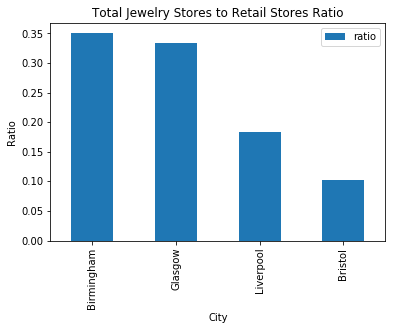

In [107]:
bar_graph_result.plot(kind='bar')
plt.title('Total Jewelry Stores to Retail Stores Ratio')
plt.xlabel('City')
plt.ylabel('Ratio')
plt.xticks(np.arange(4), ('Birmingham', 'Glasgow', 'Liverpool', 'Bristol'))

plt.show()